<a href="https://colab.research.google.com/github/sethhardik/SHALA2020/blob/master/Assignment_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

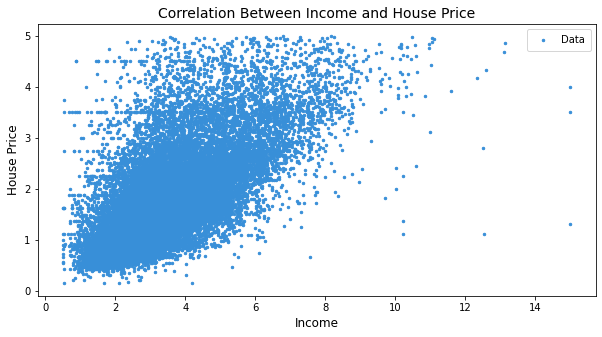

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  m,b=0.0 , 0.0
  b_grad , m_grad = 0.0 , 0.0
  mse = []
  N = len(X)
  for _ in range(epochs):
    indexes = np.random.randint(0,N,batch_size) # getting random indexes
    Xs = np.take(X,indexes)  # taking feature of these indexes
    ys = np.take(y,indexes)
    M = len(Xs)
    residue = (m * Xs + b) - ys
    b = b - lr * (residue.sum() / M)
    m = m - lr * ((Xs.dot(residue).sum()) / M)
    mse.append(mean_squared_error(y , (m * X + b)))
    
  return m, b, mse

# def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
#   m,b=0.0 , 0.0
#   b_grad , m_grad = 0.0 , 0.0
#   mse = []
#   N = len(X)
#   for _ in range(epochs):
#     for i in range(N):
#       residue = (m * X[i] + b) - y[i]
#       b_grad += residue
#       m_grad += (X[i] * residue)
#     b = b - lr * (b_grad /N)
#     m = m - lr * (m_grad/N)
#     mse.append(mean_squared_error(y , (m * X + b)))
    
#   return m, b, mse

In [0]:
m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)
mse = np.array(mse)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

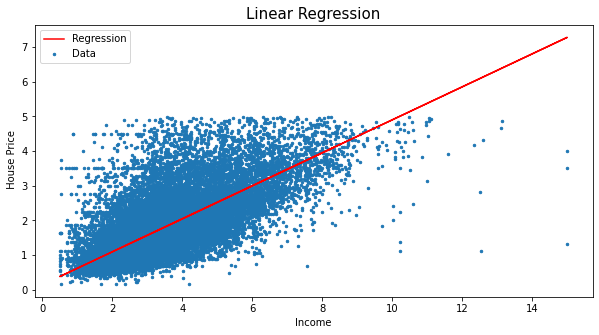

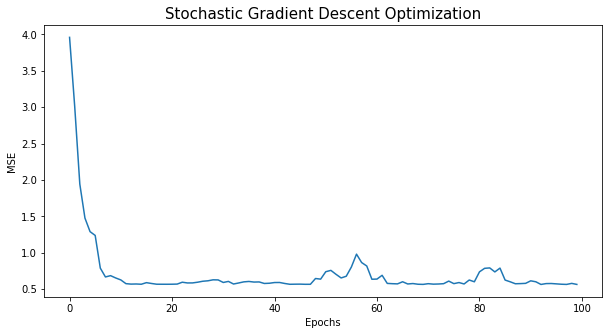

weights:0.475733816379388,0.14152795057157505
mse:0.7116390009658384


In [9]:
y_pred = m * X + b

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', s=6)
plt.plot(X, y_pred, c='red', label='Regression')
plt.title('Linear Regression', fontSize=15)
plt.xlabel('Income')
plt.ylabel(' House Price')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(mse)
plt.title('Stochastic Gradient Descent Optimization', fontSize=15)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()
print("weights:{},{}\nmse:{}".format( m , b,mse.mean()))

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:

data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



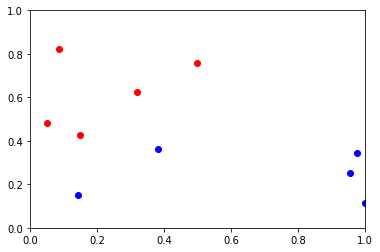

In [20]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epoch, l_rate):
  l = 1 / epoch
  N = len(x[0])
  w = np.zeros(N)
  for _ in range(epoch):
    for i, value in enumerate(x):  # tuple with (number of iteration ,  value)
      hypotheis = x[i].dot(w)
      if (y[i]*hypotheis < 1):
        w = w - l_rate * ((l * w) - (y[i] * x[i]))
      else:
        w = w - l_rate * l * w
  return w



---


**Run SVM Classifier**


---



In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)

In [23]:
pred_o , pred=[] , []
for i,v in enumerate(X):
  pred.append(np.dot(X[i],w))
print(w)
for i in pred:
  if i <= 0:
    pred_o.append(-1)
  else:
    pred_o.append(1)
pred_o=np.array(pred_o)
print("predicted o/p:{}\nreal o/p:{}".format(pred_o,Y))


[-27.02580524  19.77107358]
predicted o/p:[-1  1  1  1 -1 -1  1 -1 -1  1]
real o/p:[-1.  1.  1.  1. -1. -1.  1. -1. -1.  1.]


# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



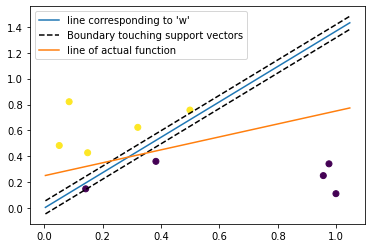

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
# Get the current Axes instance on the current figure matching the given keyword
ax = plt.gca()
# x axis limit is returned of both left and right
xlim = ax.get_xlim()
xx = np.linspace(xlim[0], xlim[1])
# calculating y cordinate 

# w.x + b = c       
yy = (-w[0] * xx - 0) / w[1]  # taking constants in decision boundary to be zero
plt.plot(xx, yy, label= "line corresponding to 'w'") 

# w.x + b = -1
yy = (-w[0] * xx - (- 1)) / w[1]  # zero - 1 for class -1
plt.plot(xx, yy, 'k--')

# w.x + b = 1
yy = (-w[0] * xx - (1)) / w[1]     # zero + 1 for class +1
plt.plot(xx, yy, 'k--',label = "Boundary touching support vectors")

yy = 0.5* xx + 0.25     # zero + 1 for class +1
plt.plot(xx, yy, '-',label="line of actual function")
plt.legend()